In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data=pd.read_csv("/content/data.csv")
print(data)

        N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]


<Axes: >

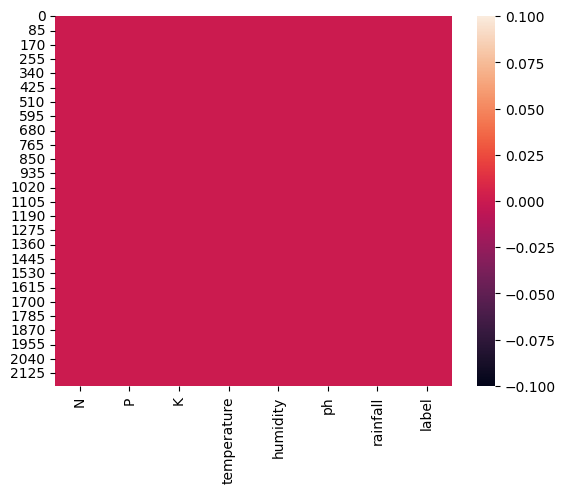

In [ ]:
sns.heatmap(data.isnull())

**Summer**

In [ ]:
print(data[(data['temperature']>30) & (data['humidity']>50)]['label'].unique())

['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']


**Winter**

In [ ]:
print(data[(data['temperature']<20) & (data['humidity']>30)]['label'].unique())

['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']


**Monsoon**

In [ ]:
print(data[(data['rainfall']>220) & (data['humidity']>50)]['label'].unique())

['rice' 'papaya' 'coconut']


In [ ]:
@interact

def summary(crops=list(data['label'].value_counts().index)):
  x=data[data['label']==crops]

  print("Maximum NITROGEN required ",x['N'].max())
  print("Average  NITROGEN required ",x['N'].mean())
  print("Minimum NITROGEN required ",x['N'].min())

  print("......................................")

  print("Maximum POTASSIUM required ",x['K'].max())
  print("Maximum POTASSIUM required ",x['K'].mean())
  print("Maximum POTASSIUM required ",x['K'].min())

  print("......................................")

  print("Maximum PHOSPHORUS required ",x['P'].max())
  print("Maximum PHOSPHORUS required ",x['P'].mean())
  print("Maximum PHOSPHORUS required ",x['P'].min())

  print("......................................")

  print("Maximum TEMPERATURE required ",x['temperature'].max())
  print("Maximum TEMPERATURE required ",x['temperature'].mean())
  print("Maximum TEMPERATURE required ",x['temperature'].min())

  print("......................................")

  print("Maximum Humidity required ",x['humidity'].max())
  print("Maximum Humidity required ",x['humidity'].mean())
  print("Maximum Humidity required ",x['humidity'].min())

  print("......................................")

  print("Maximum PH-LEVEL required ",x['ph'].max())
  print("Maximum PH-LEVEL required ",x['ph'].mean())
  print("Maximum PH-LEVEL required ",x['ph'].min())

  print("......................................")

  print("Maximum Rainfall required ",x['rainfall'].max())
  print("Maximum Rainfall required ",x['rainfall'].mean())
  print("Maximum Rainfall required ",x['rainfall'].min())

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [ ]:
%pip install -q ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.3 MB/s eta 0:00:00


In [ ]:
from ipywidgets import interact,interactive,fixed,interact_manual
import ipywidgets as widgets

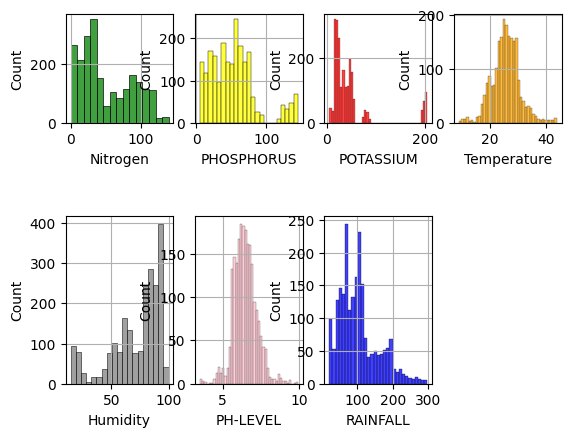

In [ ]:
plt.subplot(3,4,1)
sns.histplot(data['N'],color="green")
plt.xlabel("Nitrogen")
plt.grid()

plt.subplot(3,4,2)
sns.histplot(data['P'],color="yellow")
plt.xlabel("PHOSPHORUS")
plt.grid()

plt.subplot(3,4,3)
sns.histplot(data['K'],color="red")
plt.xlabel("POTASSIUM")
plt.grid()

plt.subplot(3,4,4)
sns.histplot(data['temperature'],color="orange")
plt.xlabel("Temperature")
plt.grid()

plt.subplot(2,4,5)
sns.histplot(data['humidity'],color="grey")
plt.xlabel("Humidity")
plt.grid()

plt.subplot(2,4,6)
sns.histplot(data['ph'],color="pink")
plt.xlabel("PH-LEVEL")
plt.grid()

plt.subplot(2,4,7)
sns.histplot(data['rainfall'],color="blue")
plt.xlabel("RAINFALL")
plt.grid()

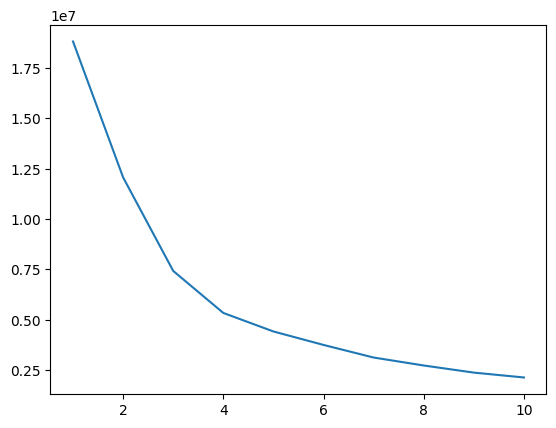

In [ ]:
from pandas.core.common import random_state
from sklearn.cluster import KMeans
x=data.drop(['label'],axis=1).values
y=data['label'].values
# print(x)
# print(y)
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,init="k-means++",max_iter=2000,n_init=10,random_state=0)
  km.fit(x)
  wcss.append(km.inertia_)

plt.plot(range(1,11),wcss)

In [ ]:
km=KMeans(n_clusters=4,init="k-means++",max_iter=2000,n_init=10,random_state=0)
km.fit(x)
y_pred=km.predict(x)
a=data['label']
y_m=pd.DataFrame(y_pred)
z=pd.concat([y_m,a],axis=1)

z=z.rename(columns={0:"cluster"})

In [ ]:
print("Cluster 1",z[z['cluster']==0]['label'].unique())

Cluster 1 ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']


In [ ]:
print("Cluster 2",z[z['cluster']==1]['label'].unique())

Cluster 2 ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']


In [ ]:
print("Cluster 3",z[z['cluster']==2]['label'].unique())

Cluster 3 ['grapes' 'apple']


In [ ]:
print("Cluster 4",z[z['cluster']==3]['label'].unique())

Cluster 4 ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0)
print(x_train)

[[ 27.         120.         200.         ...  90.74531921   6.11021883
  116.7036582 ]
 [ 81.          36.          38.         ...  87.98329901   6.33483786
  150.3166152 ]
 [ 90.          59.          35.         ...  89.86454053   7.09822793
  175.1742112 ]
 ...
 [ 35.          64.          15.         ...  63.53604453   6.50014496
   69.5274407 ]
 [ 39.          65.          23.         ...  69.12613376   7.6859593
   41.02682925]
 [ 14.          22.           9.         ...  91.13772765   6.54319181
  112.5090516 ]]


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x,y)

LogisticRegression()

In [ ]:
inp=[[40,40,40,40,100,.7,200]]
yp=model.predict(inp)
print(yp)

['coconut']


In [ ]:
y_pred=model.predict(x_test)
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.90      0.86      0.88        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      0.94      0.97        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.92      0.96      0.94        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

<Axes: >

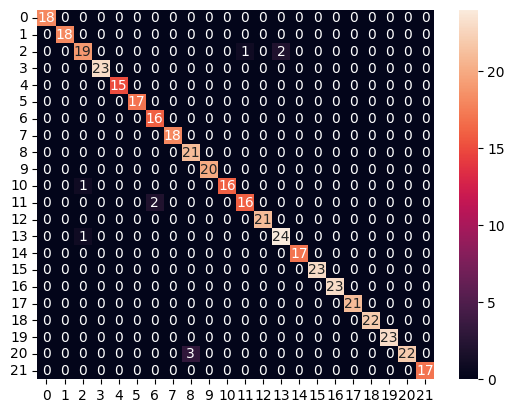

In [ ]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [1]:
!python -m venv myenv


In [ ]:
!myenv\Scripts\activate